Validation Accuracy - Random Forest: 0.8105022831050228
Validation Accuracy - SVM: 0.6529680365296804
Test Accuracy - Random Forest: 0.7990867579908676
Test Accuracy - SVM: 0.6301369863013698


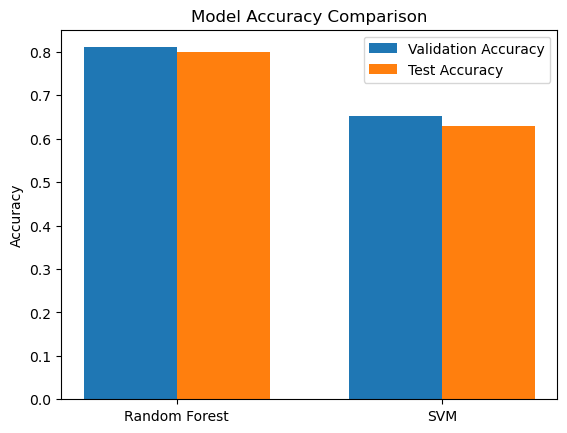

In [1]:
import sys
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC 
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt 

df_dna = pd.read_csv("human.csv")
df_dna

y = df_dna["class"]

kmer_length = 4
df_dna["words"] = df_dna["sequence"].apply(lambda seq: [seq[i:i+kmer_length] for i in range(0, len(seq) - kmer_length + 1)])
df_dna

# Vectorize the k-mers
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df_dna["words"].apply(lambda x: " ".join(x)))

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Initialize and train Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

# Validate Random Forest
y_predicted_valid_rf = rf_classifier.predict(X_valid)
accuracy_valid_rf = accuracy_score(y_valid, y_predicted_valid_rf)

# Initialize and train Support Vector Machine (SVM)
svm_classifier = SVC()
svm_classifier.fit(X_train, y_train)

# Validate SVM
y_predicted_valid_svm = svm_classifier.predict(X_valid)
accuracy_valid_svm = accuracy_score(y_valid, y_predicted_valid_svm)

# Testing both models on the test set
y_predicted_test_rf = rf_classifier.predict(X_test)
accuracy_test_rf = accuracy_score(y_test, y_predicted_test_rf)

y_predicted_test_svm = svm_classifier.predict(X_test)
accuracy_test_svm = accuracy_score(y_test, y_predicted_test_svm)

# Print model accuracy
print("Validation Accuracy - Random Forest:", accuracy_valid_rf)
print("Validation Accuracy - SVM:", accuracy_valid_svm)

print("Test Accuracy - Random Forest:", accuracy_test_rf)
print("Test Accuracy - SVM:", accuracy_test_svm)


# Create a bar graph to compare model accuracy
models = ['Random Forest', 'SVM']
validation_accuracies = [accuracy_valid_rf, accuracy_valid_svm]
test_accuracies = [accuracy_test_rf, accuracy_test_svm]

x = np.arange(len(models))
width = 0.35

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, validation_accuracies, width, label='Validation Accuracy')
rects2 = ax.bar(x + width/2, test_accuracies, width, label='Test Accuracy')

ax.set_ylabel('Accuracy')
ax.set_title('Model Accuracy Comparison')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()

plt.show()